# **State Space Models**

A state space model is a framework that describes a system's dynamics, where the system's state evolves over time and is observed through noisy measurements. We will focus here on a broad and general class of models. Examples include time series models (AR, MA, ARMA), and HMMs. 

The state space model is a general class of time series models. Most practical models can be represented within this category, using a state vector of finite dimensions. The sequential inference methods presented can readily be extended beyond the Markovian state space models given here, but for simplicity we will be only looking at the standard Markovian setup.

*From now on, column vectors are denotes using standard typeface (e.g. $x$), and matrices are denoted by capitals (e.g. B)*

- Consider a time series with states $x_t \in \mathbb{R}$ where $t \in {0, 1, ..., T}$ 
- Assume the evolution of the state follows a 1st order Markovian structure:
$$
p(x_{t+1}| x_0, x_1, ..., x_t) = f(x_{t+1}|x_t)
$$
- The states are 'partially' through a likelihood function which is assumed to depend only on the current state:
$$
p(y_{t+1}| x_0, x_1, ..., x_{t+1}, y_0, y_1, ..., y_t) = g(y_{t+1} | x_{t+1})
$$

In summary, the **state space model** is defined by the:
1) **State evolution density**
$$
x_{t+1} \sim f(x_{t+1} | x_t)
$$
2) **Observation density**
$$
y_{t+1} \sim g(y_{t+1}|x_{t+1})
$$

We can use the chain rule to express the joint density like so:

\begin{align}
p(x_{0:t}, y_{1:t}) &= p(x_0) \prod_{i=1}^t p(x_t|x_{0:t-1}) p(y_t | x_{0:t}, y_{1:t-1}) \\ 
&= f(x_0 )\prod_{i=1}^t f(x_t | x_{t-1}) g(y_t | x_t)
\end{align}

Note, $p(x_0) = f(x_0)$ is the distribution of the initial state.

If we apply Bayes theorem:
$$
p(x_t | y_t, x_{t-1}) = \frac{f(x_t | x_{t-1}) g(y_t | x_t)}{p(y_t | x_{t-1})}
$$

Note, this expression uses Bayes' theorem in a form where all of the probabilities are conditional upon $x_{t-1}$

$$
p(A | B, C) = \frac{p(A | C) p(B | A, C)}{p(B | C)}
$$

We can compute the normalisation constant like so:

$$
p(y_t | x_{t-1}) = \int p(x_t | x_{t-1}) p(y_t | x_t, x_{t-1}) dx_t
$$

This equation represents the marginal likelihood of observing $y_t$ at time $t$, given the previous state $x_{t-1}$, by integrating over all possible hidden states $x_t$, weighted by their transition probabilities and observation likelihoods.

### Generative Model
It is easy to produce a generative model which generates data that is representative of this system, given that we know the state evolution density and observation density.
- Sample to obtain the intial state $x_0 \sim f(x_0)$ 
- For t = 1, 2, 3, ..., T do 

    $x_t \sim f(x_t | x_{t-1})$ 

    $y_t \sim g(y_t | x_t)$

- Output $x_{0:T}, y_{1:T}$

e.g)  **Random Walk in Noise**

$$
x_t = x_{t-1} + v_t, \quad v_t \sim \mathcal{N}(0, \sigma_v^2)
$$

$$
y_t = x_t + w_t, \quad w_t \sim \mathcal{N} (0, \sigma_w^2)
$$

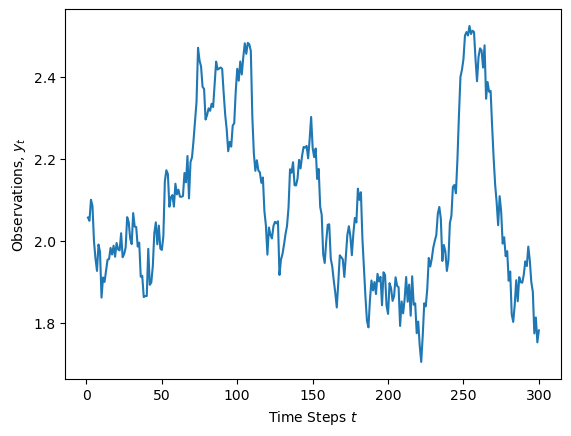

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Dimension of state x_t and observations y_t
N, M = 1, 1

# Initial state vector will ve a Gaussian 
init_mu = 2
init_sigma = 0.1

# Noise variances
sigma_v = 0.05
sigma_w = 0.

# Sytem matrix A
A = 1

# Observation matrix
B = 1


x_current = np.random.normal(loc=init_mu, scale=init_sigma, size=1)
T = 300

# Initialise ouput array
output = np.zeros(T)

for t in range(1, T+1):
    x_current = A*x_current + np.random.normal(loc=0, scale=sigma_v)
    y_current = B*x_current + np.random.normal(loc=0, scale=sigma_w)
    output[t-1] = y_current[0]

plt.plot(np.arange(1,301), output)
plt.ylabel("Observations, $y_t$")
plt.xlabel("Time Steps $t$")
plt.show()